In [68]:
%matplotlib inline
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab

print(sys.version)
print('Pandas:', pd.__version__)

3.6.2 (default, Jul 17 2017, 16:44:45) 
[GCC 4.2.1 Compatible Apple LLVM 8.1.0 (clang-802.0.42)]
Pandas: 0.20.3


In [2]:
df = pd.read_excel('data/GTD/globalterrorismdb_0617dist.xlsx')

In [3]:
lista = df.columns.tolist()

In [4]:
lista

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [5]:
df = df.loc[:,['eventid', 'iyear', 'country_txt','region_txt','doubtterr','nkill','nwound','summary']]

#### Första checkpoint

In [6]:
df.to_csv('totalt_70-16.csv')

In [7]:
df = pd.read_csv('totalt_70-16.csv')

In [8]:
df1 = df.copy()

In [9]:
df2 = df1[df1['doubtterr'] == 0]

In [10]:
del df2['doubtterr']

In [11]:
df2['skada_döda'] = df2.nkill + df2.nwound

/Users/johan.ekman/.virtualenvs/pandas_projects/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
df2.loc[:,'eventid_str'] = df2.eventid.astype(str)

/Users/johan.ekman/.virtualenvs/pandas_projects/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/johan.ekman/.virtualenvs/pandas_projects/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
datetime = pd.to_datetime(df2.eventid_str.str.slice(0, 8), format='%Y%m%d', errors='coerce')


In [14]:
df2['datetime'] = datetime

/Users/johan.ekman/.virtualenvs/pandas_projects/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df2 = df2.iloc[:,[-1,1,2,3,4,5,6,7,8,]]

In [16]:
df_continents = df2.groupby(['iyear', 'region_txt']).sum().sort_values('skada_döda', ascending=False).iloc[:,-1].sort_values(ascending=False)

NameError: name 'pylab' is not defined

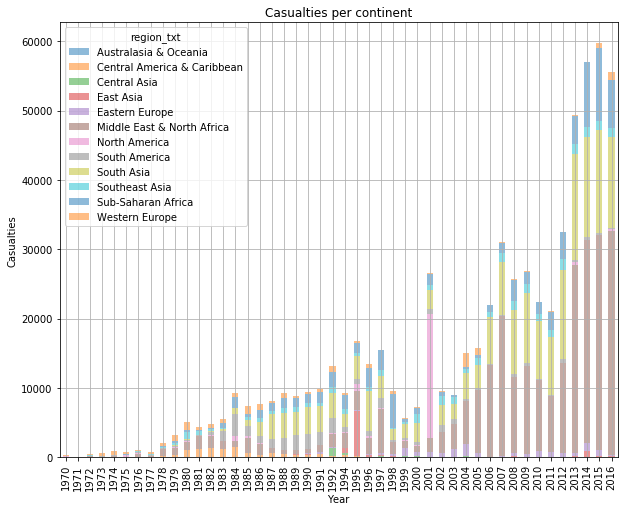

In [17]:
my_plot = df_continents.unstack().plot(kind='bar',stacked=True,\
                                       alpha=0.5, title="Casualties per continent",\
                                      figsize=(10,8))
my_plot.set_xlabel("Year")
my_plot.set_ylabel("Casualties")
my_plot.grid(True)
pylab.legend(loc='best')
plt.savefig('casualties.png')


In [18]:
import math

Om man önskar en percentilindelare att använda i sin plot som färgsättare kan man använda följande:

In [19]:
df2['percentil'] = df2['nkill']\
.fillna(0).apply(lambda x: math.ceil(x / 10))\
.apply(lambda x: np.nan if x == 0 else x)

In [20]:
df2['datetime2'] = df2.datetime.astype(str)

In [21]:
df2['datetime2'] = df2.datetime2.str.replace('-', '')

Here, exkluding undated attacks (84 rows out of 88.000):

In [22]:
df2 = df2[df2['datetime2'] != "NaT"]

In [23]:
df2.set_index('datetime',inplace=True)

#### Andra checkpoint

In [25]:
df2.to_csv('bearbetning1.csv')

In [26]:
df2 = pd.read_csv('bearbetning1.csv')

In [27]:
regions = ['Australasia & Oceania',\
                          'Central America & Caribbean',\
                          'Central Asia',\
                         'Eastern Europe',\
                         'Middle East & North Africa',\
                         'North America',\
                         'South America',\
                         'South Asia',\
                         'Southeast Asia',\
                         'Sub-Saharan Africa',\
                         'Western Europe']

In [28]:
df3 = df2[df2['region_txt'].isin(regions)]

In [31]:
df3.columns

Index(['datetime', 'eventid', 'iyear', 'country_txt', 'region_txt', 'nkill',
       'nwound', 'summary', 'skada_döda', 'percentil', 'datetime2'],
      dtype='object')

In [32]:
df3 = df3[df3['iyear'] > 1996]

In [33]:
df_continents = df3.loc[:,['iyear', 'country_txt', 'region_txt',\
           'nkill', 'datetime']].groupby(['iyear', 'region_txt'])\
.sum().iloc[:,-1]

In [34]:
regions = df_continents.unstack().columns.tolist()
non_west_regions = pd.Series(regions)[~pd.Series(regions).index.isin([5,10])].tolist()

In [35]:
non_west_regions

['Australasia & Oceania',
 'Central America & Caribbean',
 'Central Asia',
 'Eastern Europe',
 'Middle East & North Africa',
 'South America',
 'South Asia',
 'Southeast Asia',
 'Sub-Saharan Africa']

In [36]:
west_deaths_per_year = df_continents.unstack().loc[:,[regions[5], regions[10]]].sum(axis=1).tolist()
west_deaths_per_year = [int(x) for x in west_deaths_per_year]

In [37]:
rest_deaths_per_year = df_continents.unstack().loc[:,non_west_regions].sum(axis=1).tolist()
rest_deaths_per_year = [int(x) for x in rest_deaths_per_year]

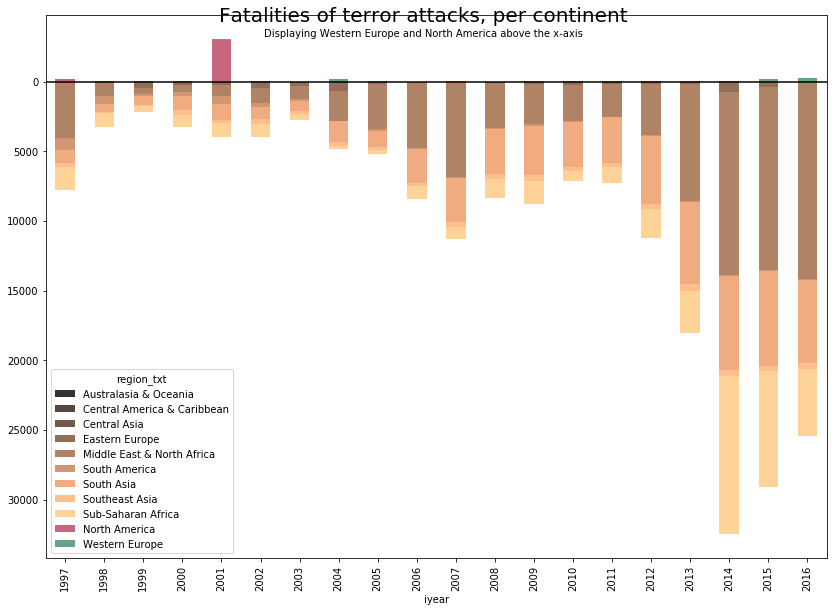

In [38]:
ax = df_continents.unstack().loc[:,non_west_regions].apply(lambda x: x*-1)\
                                        .plot(kind='bar',stacked=True,\
                                       alpha=0.8,\
                                      figsize=(14,10), colormap='copper')
df_continents.unstack().loc[:,[regions[5], regions[10]]].plot(ax=ax, kind='bar',stacked=True,\
                                       alpha=0.6,\
                                      figsize=(14,10), colormap='RdYlGn')
ax.axhline(color='k', linestyle='-')
ax.set_yticklabels([str(int(abs(x))) for x in ax.get_yticks()])

plt.figtext(.5,.87,'Fatalities of terror attacks, per continent', fontsize=20, ha='center')
plt.figtext(.5,.85,'Displaying Western Europe and North America above the x-axis',fontsize=10,ha='center')
plt.style.use(style='ggplot')
#plt.grid(True)
plt.savefig('causualties_per_continent.png')



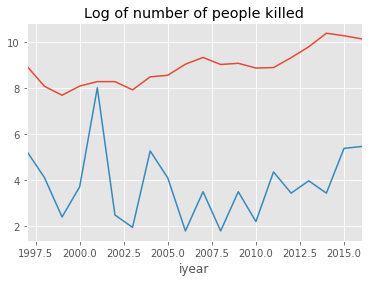

In [39]:
ax = np.log(df_continents.unstack().loc[:,non_west_regions].sum(axis=1)).plot(title='Log of number of people killed')
np.log(df_continents.unstack().loc[:,[regions[5], regions[10]]].sum(axis=1)).plot(ax=ax)
plt.savefig('nkill_log.png')
#plt.legend()

In [40]:
~pd.Series(regions).index.isin([5,10])

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False], dtype=bool)

In [41]:
df_continents = df3.loc[:,['iyear', 'country_txt', 'region_txt',\
           'nkill', 'datetime']].groupby(['datetime', 'region_txt'])\
.sum().iloc[:,-1]

In [42]:
df_rest = df_continents.unstack()
df_west = df_continents.unstack()

In [43]:
df_rest['totalt'] = df_continents.unstack().T[~pd.Series(regions).index.isin([5,10])].sum()
df_west['totalt'] = df_continents.unstack().T[pd.Series(regions).index.isin([5,10])].sum()

In [44]:
df_west = df_west[1616:]

In [45]:
df_rest = df_rest[1616:]

In [46]:
plt.style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn']

In [47]:
df_totalt = pd.DataFrame(df_west)

In [54]:
df_totalt['nkill_rest'] = df_rest['totalt']

In [55]:
df_totalt.rename(columns={'totalt':'nkill_väst'}, inplace=True)

#### Checkpoint 3

In [56]:
df_totalt.to_csv('nkill_totalt.csv')

In [57]:
df_total = pd.read_csv('nkill_totalt.csv')

In [58]:
df_total['datetime'] = pd.to_datetime(df_total.datetime)

In [59]:
df_total.set_index('datetime', inplace=True)

In [60]:
import datetime as dt
start = df_total.index.searchsorted(dt.datetime(2007, 1, 1))

end = df_total.index.searchsorted(dt.datetime(2016, 12, 31))


In [61]:
df_total.shape

(5298, 13)

In [62]:
df_total = df_total.ix[start:end]

/Users/johan.ekman/.virtualenvs/pandas_projects/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [63]:
from matplotlib import ticker
from matplotlib import dates

In [64]:
plt.style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn']

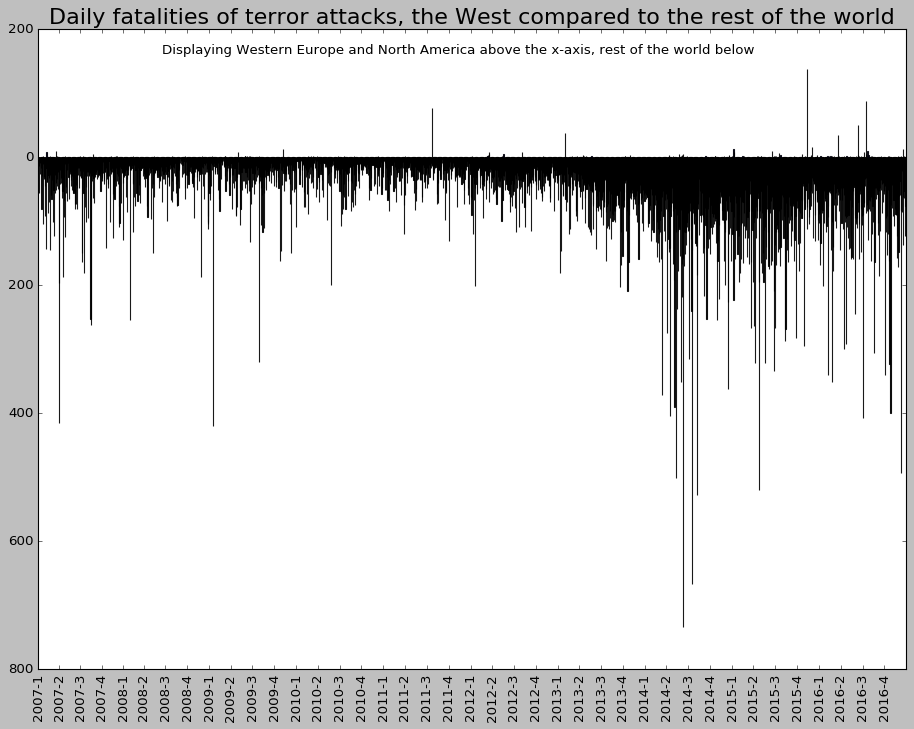

In [66]:
ax = df_total.nkill_rest.apply(lambda x: x*-1).plot(kind='bar',\
                                       alpha=0.9,\
                                      figsize=(14,10),\
                                        color='k')
df_total.nkill_väst.plot(ax=ax, kind='bar', alpha=0.9,figsize=(14,10), color='b')

plt.style.use(style='ggplot')
xtick_idx = np.hstack((True, np.diff(df_total.index.quarter)!=0))
xtick = ['{0:d}-{1:d}'.format(*item) for item in zip(df_total.index.year,\
                                                             df_total.index.quarter)]
ax.xaxis.set_ticks(np.arange(len(xtick))[xtick_idx])
ax.xaxis.set_ticklabels(np.array(xtick)[xtick_idx])
plt.title('Daily fatalities of terror attacks, the West compared to the rest of the world', fontsize=20)
#plt.figtext(.5,.87,'Fatalities of terror attacks, per continent', fontsize=20, ha='center')
plt.figtext(.5,.87,'Displaying Western Europe and North America above the x-axis, rest of the world below',fontsize=12,ha='center')
plt.xlabel('')
ax.set_yticklabels([str(int(abs(x))) for x in ax.get_yticks()])

plt.savefig('nkill_per_day.png')



